# Face Mask Detection using YOLOv5

# Load the models and necessary requirements!!!



In [ ]:
!git clone https://github.com/ultralytics/yolov5 # clone repo
!pip install -U -r yolov5/requirements.txt # install dependencies

Cloning into 'yolov5'...
remote: Enumerating objects: 9143, done.
remote: Total 9143 (delta 0), reused 0 (delta 0), pack-reused 9143
Receiving objects: 100% (9143/9143), 9.74 MiB | 20.20 MiB/s, done.
Resolving deltas: 100% (6345/6345), done.
     |████████████████████████████████| 10.3 MB 5.4 MB/s 
     |████████████████████████████████| 15.7 MB 189 kB/s 
     |████████████████████████████████| 49.9 MB 16 kB/s 
     |████████████████████████████████| 3.0 MB 33.6 MB/s 
     |████████████████████████████████| 636 kB 41.1 MB/s 
     |████████████████████████████████| 28.5 MB 50 kB/s 
     |████████████████████████████████| 831.4 MB 6.5 kB/s 
     |████████████████████████████████| 22.1 MB 1.5 MB/s 
     |████████████████████████████████| 76 kB 3.1 MB/s 
     |████████████████████████████████| 11.3 MB 38.6 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: nump

#Connect google drive in order to reach the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#Train the model, set the required parameters for training (type of model, weight file..)

In [ ]:
!python yolov5/train.py --img 416 --batch 16 --epochs 5 --data drive/MyDrive/data_3class_final.yaml --cfg yolov5/models/yolov5s.yaml --weights yolov5s.pt --name drive/MyDrive/robo4_epoch30_s --adam

train: weights=yolov5s.pt, cfg=yolov5/models/yolov5s.yaml, data=drive/MyDrive/data_3class_final.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=5, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=True, sync_bn=False, workers=8, project=runs/train, entity=None, name=drive/MyDrive/robo4_epoch30_s, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1, freeze=0, patience=100
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 v5.0-454-g9febea7 torch 1.9.1+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, io

#Test the model, load the weights and give the path of the test data to source

In [ ]:
!python yolov5/detect.py --weights best.pt --source 0 --iou-thres 0.3 --conf-thres 0.6

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.6, device='', exist_ok=False, img_size=640, iou_thres=0.3, name='exp', nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='0', update=False, view_img=False, weights=['best.pt'])
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v4.0-190-gfca5e2a torch 1.8.1+cu101 CPU

Fusing layers... 
Model Summary: 224 layers, 7056607 parameters, 0 gradients, 16.3 GFLOPS
qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "/usr/local/lib/python3.7/dist-packages/cv2/qt/plugins" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: xcb.



#Run these blocks in order to use your webcamera for testing

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


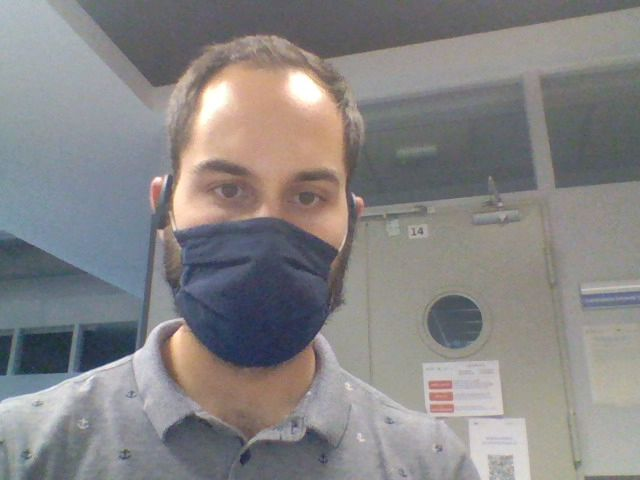

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
import numpy as np
import cv2
from IPython.display import display, Javascript, Image


# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img


# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 1
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])
    filename='photo.jpg'
    cv2.imwrite(filename, frame)
   

    !python yolov5/detect.py --weights best.pt --source 'photo.jpg' --name output/web --iou-thres 0.3 --conf-thres 0.6

    if(count==1):
      display(Image('output/web/'+filename))
    





    # create transparent overlay for bounding box
    #bbox_array = np.zeros([480,640,4], dtype=np.uint8)

<IPython.core.display.Javascript object>

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.6, device='', exist_ok=False, img_size=640, iou_thres=0.3, name='output/web', nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='photo.jpg', update=False, view_img=False, weights=['best.pt'])
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v4.0-190-gfca5e2a torch 1.8.1+cu101 CPU

Fusing layers... 
Model Summary: 224 layers, 7056607 parameters, 0 gradients, 16.3 GFLOPS
image 1/1 /content/photo.jpg: 480x640 1 good, Done. (0.520s)
Results saved to runs/detect/output/web11
Done. (0.538s)


Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.6, device='', exist_ok=False, img_size=640, iou_thres=0.3, name='output/web', nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='photo.jpg', update=False, view_img=False, weights=['best.pt'])
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v4.0-190-gfca5e2a torch 1.8.1+cu101 CPU

Fusing layers... 
Model Summary: 224 layers, 7056607 parameters, 0 gradients, 16.3 GFLOPS
image 1/1 /content/photo.jpg: 480x640 1 good, Done. (0.515s)
Results saved to runs/detect/output/web12
Done. (0.532s)


Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.6, device='', exist_ok=False, img_size=640, iou_thres=0.3, name='output/web', nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='photo.jpg', update=False, view_img=False, weights=['best.pt'])
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v4.0-190-gfca5e2a torch 1.8.1+cu101 CPU

Fusing layers... 
Model Summary: 224 layers, 7056607 parameters, 0 gradients, 16.3 GFLOPS
image 1/1 /content/photo.jpg: 480x640 1 good, Done. (0.521s)
Results saved to runs/detect/output/web13
Done. (0.539s)


Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.6, device='', exist_ok=False, img_size=640, iou_thres=0.3, name='output/web', nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='photo.jpg', update=False, view_img=False, weights=['best.pt'])
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v4.0-190-gfca5e2a torch 1.8.1+cu101 CPU

Fusing layers... 
Model Summary: 224 layers, 7056607 parameters, 0 gradients, 16.3 GFLOPS
image 1/1 /content/photo.jpg: 480x640 1 good, Done. (0.512s)
Results saved to runs/detect/output/web14
Done. (0.529s)


Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.6, device='', exist_ok=False, img_size=640, iou_thres=0.3, name='output/web', nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='photo.jpg', update=False, view_img=False, weights=['best.pt'])
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v4.0-190-gfca5e2a torch 1.8.1+cu101 CPU

Fusing layers... 
Model Summary: 224 layers, 7056607 parameters, 0 gradients, 16.3 GFLOPS
image 1/1 /content/photo.jpg: 480x640 1 good, Done. (0.521s)
Results saved to runs/detect/output/web15
Done. (0.539s)


Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.6, device='', exist_ok=False, img_size=640, iou_thres=0.3, name='output/web', nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='photo.jpg', update=False, view_img=False, weights=['best.pt'])
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v4.0-190-gfca5e2a torch 1.8.1+cu101 CPU

Fusing layers... 
Model Summary: 224 layers, 7056607 parameters, 0 gradients, 16.3 GFLOPS
image 1/1 /content/photo.jpg: 480x640 1 good, Done. (0.511s)
Results saved to runs/detect/output/web16
Done. (0.528s)


Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.6, device='', exist_ok=False, img_size=640, iou_thres=0.3, name='output/web', nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='photo.jpg', update=False, view_img=False, weights=['best.pt'])
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v4.0-190-gfca5e2a torch 1.8.1+cu101 CPU

Fusing layers... 
Model Summary: 224 layers, 7056607 parameters, 0 gradients, 16.3 GFLOPS
image 1/1 /content/photo.jpg: 480x640 1 good, Done. (0.520s)
Results saved to runs/detect/output/web17
Done. (0.537s)


Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.6, device='', exist_ok=False, img_size=640, iou_thres=0.3, name='output/web', nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='photo.jpg', update=False, view_img=False, weights=['best.pt'])
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v4.0-190-gfca5e2a torch 1.8.1+cu101 CPU

Fusing layers... 
Model Summary: 224 layers, 7056607 parameters, 0 gradients, 16.3 GFLOPS
image 1/1 /content/photo.jpg: 480x640 1 good, Done. (0.512s)
Results saved to runs/detect/output/web18
Done. (0.529s)


Complementary notebook for the blog post [Face Mask Detection using YOLOv5](https://towardsdatascience.com/face-mask-detection-using-yolov5-3734ca0d60d8)

### Manipulating the labels of the annotations or modifying and removing them:

In [ ]:
import re
import os.path
from os import path
import os

In [ ]:
for folder in ['training_data']:
    file_list = os.listdir(f'drive/MyDrive/{folder}/')
    for file in file_list:
        #if file.endswith('.jpg'): 
         # continue;
  
       
        #if file.endswith('Mask.txt'):
            #with open(f'drive/MyDrive/{folder}/{file}', 'r+') as f:
             # lines = f.read()
              #replaced = re.sub(r'0(?=\s\d+\.\d+){4}', '1', lines)
              #f.seek(0)
              #f.write(replaced)
              #f.truncate()

              
        #if 'COCO' in file:
         #   with open(f'drive/MyDrive/{folder}/{file}', 'r+') as f:
          #    lines = f.read()
           #   replaced = re.sub(r'0(?=\s\d+\.\d+){4}', '2', lines)
            #  f.seek(0)
             # f.write(replaced)


# Counting the number of the images from each class

In [ ]:
for folder in ['training_data']:
    number_COCO=0;
    number_Mask=0;
    number_Mask_extra=0;
    number_kaggle=0;
    file_list = os.listdir(f'drive/MyDrive/{folder}/')
    print(np.shape(file_list))
    for file in file_list:
      if file.endswith('.txt'): 
        continue;
      
      if 'COCO' in file:
        number_COCO=number_COCO+1
        continue;

      if file.endswith('Mask.jpg'):
        number_Mask=number_Mask+1
        continue;

      if 'maksss' in file:
        number_kaggle=number_kaggle+1
        continue;

      number_Mask_extra=number_Mask_extra+1



print(number_COCO)
print(number_Mask)
print(number_Mask_extra)
print(number_kaggle)

      


(37668,)
7063
4916
6007
848


In [ ]:
file_list = os.listdir(f'drive/MyDrive/training_data/')
print(np.shape(file_list))
file_list = os.listdir(f'drive/MyDrive/validation_data/')
print(np.shape(file_list))


(33902,)
(3766,)


#Random splitting and saving, change the path or adjust yours to it




In [ ]:
import random

number_validation=round(37668/2*0.1)

for i in range(0, number_validation):
  file_list = os.listdir(f'drive/MyDrive/training_data/')
  file=random.choice(file_list)
  if file.endswith('.jpg'): 
    label = file.rstrip('.jpg')
    other_file=label + '.txt'
  else:
    label = file.rstrip('.txt')
    other_file=label + '.jpg'

  os.rename('drive/MyDrive/training_data/' + file, 'drive/MyDrive/validation_data/' + file)
  os.rename('drive/MyDrive/training_data/' + other_file, 'drive/MyDrive/validation_data/' + other_file)

  




### Downloading images from the COCO dataset, these are used as "without mask" training data


In [ ]:

from pycocotools.coco import COCO
import requests

In [ ]:
path = 'drive/MyDrive/instances_val2014.json'

In [ ]:
coco = COCO(path)

loading annotations into memory...
Done (t=11.31s)
creating index...
index created!


In [ ]:
#We will use just the person labels
coco.getCatIds(catNms=['person'])

[1]

In [ ]:
catIds = coco.getCatIds(catNms=['person'])
imgIds = coco.getImgIds(catIds=catIds)

In [ ]:
images = coco.loadImgs(imgIds)

URL and relevant data from the images

In [ ]:
print(len(images))
images[0]

img_data = requests.get(images[0]['url']).content





21634


Download a subset of the images via `request`:

In [ ]:
# Save the images into a local folder
for im in images[1:20000]:
    img_data = requests.get(im['url']).content
    with open('drive/MyDrive/training_data/' + im['file_name'], 'wb') as handler:
        handler.write(img_data)

#Creating the annotations manually using face detections by facenet-pytorch

In [ ]:
!pip install facenet-pytorch

     |████████████████████████████████| 1.9MB 10.8MB/s 


### Face detection using MTCNN









In [ ]:
from facenet_pytorch import MTCNN, extract_face
import matplotlib.image as mpl
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np

import os.path
from os import path

In [ ]:
#keep_all=true, we want to keep all the possible detections, not just one of them
mtcnn = MTCNN(keep_all=True)

In [ ]:
#Convert the detections to darknet format (x_center, y_center, blob_width, blob_height)
def convert(size, box):


    #It can happen that x_start and y_start is negative, which is not good for darknet
    x_start=np.max(np.array([0, box[0]]))
    y_start=np.max(np.array([0, box[2]]))

    x_end=np.min(np.array([size[0], box[1]]))
    y_end=np.min(np.array([size[1], box[3]]))


    dw = 1./size[0]
    dh = 1./size[1]


    x = (x_start + x_end)/2.0
    y = (y_start + y_end)/2.0
    w = x_end - x_start
    h = y_end - y_start
    x = x*dw
    w = w*dw
    y = y*dh
    h = h*dh
    return [x,y,w,h]

In [ ]:
from pathlib import Path


#Set the paths
file_path = '/content/drive/MyDrive/training_data/' 
labels_path = '/content/drive/MyDrive/training_data/'

ims = os.listdir(file_path)
ignored_ones = []

#Counter
it=0
for img in ims:


    print(it)
    it=it+1
    
    im_path = file_path+'/'+img

    #we should deal just with the images
    if img.endswith('.txt'):
      continue;

    #If there are corrupted images, we need to eliminate them, COCO dataset is noisy!! images with small size will be deleted
    if Path(im_path).stat().st_size<1000:
        os.remove(im_path)
        continue

    im=mpl.imread(im_path)


    try:
        boxes, probs, points = mtcnn.detect(im, landmarks=True)
    except RuntimeError as e:
        print(f"Failed to detected image {im_path}")
        #os.remove(im_path)
        continue
        
    if boxes is not None:

        #we can visualize the detections
        #for box, prob in zip(boxes, probs):

         #   we are considering just the certain detections          
         #   if prob>=0.95:
            
          #    startX, startY, endX, endY = box.astype(int)
           #   color = (0,255,0) 
            #  cv2.putText(im, 
             #             f'{prob:.1%}', 
              #            (startX, startY - 10), 
               #           fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                #          fontScale=.5, 
                 #         color=color,
                  #        thickness=2)
              #cv2.rectangle(im, (startX, startY), (endX, endY), color, 2) 

        h= int(im.shape[0])
        w= int(im.shape[1])

        label = img.rstrip('.jpg')
        
        #van logical variable is designed to indicate whether an image includes detections
        van=False

        #Counts the number of the detections
        i=0


        with open(rf'{labels_path}{label}.txt', 'w') as f:
            for item, prob in zip(boxes, probs):
              if 'COCO' in label:
                #COCO is noisy, we consider just the certain detections
                if prob>=0.95:
                  van=True
                  startX, startY, endX, endY = item.astype(int)
                  b = (startX, endX, startY, endY)
                  bb = convert((w,h), b)

                  bb=np.array(bb, dtype=np.float32)

                  box = ' '.join(bb.astype(str))

                  f.write(f"0 {box}\n")
              else:
                i=i+1
                van=True
                startX, startY, endX, endY = item.astype(int)
                b = (startX, endX, startY, endY)
                bb = convert((w,h), b)

                bb=np.array(bb, dtype=np.float32)

                box = ' '.join(bb.astype(str))

                f.write(f"0 {box}\n")

        if not van:
          #If there is no detections, delete the image and the newly-created annotation file
          os.remove(im_path)
          
          os.remove(rf'{labels_path}{label}.txt')

        if i>1:

          #If there are more than detections in a frame, where onyl one detection is meant to be detected, delete it
          os.remove(im_path)
          
          os.remove(rf'{labels_path}{label}.txt')

            

        print(img)

        #For visualizing
        #plt.imshow(im)
        #plt.show()

        

    else:
        #ignored_ones.append(im_path)
        os.remove(im_path)

0
39934_Mask.jpg
1
39907_Mask.jpg
2
39962_Mask.jpg
3
39784_Mask.jpg
4
39806_Mask.jpg
5
39943_Mask.jpg
6
39853_Mask.jpg
7
39998_Mask.jpg
8
38866_Mask.jpg
9
38819_Mask.jpg
10
38848_Mask.jpg
11
38768_Mask.jpg
12
38823_Mask.jpg
13
38908_Mask.jpg
14
38805_Mask.jpg
15
38861_Mask.jpg
16
38913_Mask.jpg
17
38821_Mask.jpg
18
38841_Mask.jpg
19
38871_Mask.jpg
20
38801_Mask.jpg
21
38786_Mask.jpg
22
38772_Mask.jpg
23
38839_Mask.jpg
24
38960_Mask.jpg
25
39083_Mask.jpg
26
38994_Mask.jpg
27
39047_Mask.jpg
28
39085_Mask.jpg
29
39018_Mask.jpg
30
39120_Mask.jpg
31
39089_Mask.jpg
32
39095_Mask.jpg
33
39148_Mask.jpg
34
39050_Mask.jpg
35
39041_Mask.jpg
36
39134_Mask.jpg
37
39048_Mask.jpg
38
39206_Mask.jpg
39
39290_Mask.jpg
40
39227_Mask.jpg
41
39338_Mask.jpg
42
39176_Mask.jpg
43
39191_Mask.jpg
44
39222_Mask.jpg
45
39266_Mask.jpg
46
39352_Mask.jpg
47
39337_Mask.jpg
48
39282_Mask.jpg
49
39250_Mask.jpg
50
39202_Mask.jpg
51
39257_Mask.jpg
52
39153_Mask.jpg
53
39242_Mask.jpg
54
39287_Mask.jpg
55
39326_Mask.jpg
56

#Visualize one image

(1024, 1024, 3)
(667, 1409, 37, 830)
[0.82568359375, 0.42333984375, 0.3486328125, 0.7744140625]
(271, 733, 231, 745)
[0.490234375, 0.4765625, 0.451171875, 0.501953125]


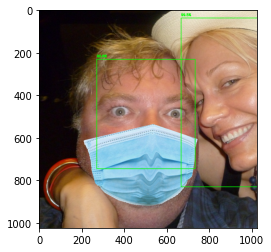

In [ ]:
        
        path = '/content/drive/MyDrive/training_data/' 

        im=mpl.imread(path + '00044_Mask.jpg')

        boxes, probs, points = mtcnn.detect(im, landmarks=True)      

        
        h= int(im.shape[0])
        w= int(im.shape[1])  

        print(im.shape)
        
        for box, prob in zip(boxes, probs):


              startX, startY, endX, endY = box.astype(int)
              b = (startX, endX, startY, endY)

              print(b)
              print(convert((w, h), b))

              startX, startY, endX, endY = box.astype(int)
              color = (0,255,0) 
              cv2.putText(im, 
                          f'{prob:.1%}', 
                          (startX, startY - 10), 
                          fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                          fontScale=.5, 
                          color=color,
                          thickness=2)
              cv2.rectangle(im, (startX, startY), (endX, endY), color, 2) 

        plt.imshow(im)
        plt.show()